# Exploratory Data Analysis on Selftext (Post Content)

_This notebook will be used to perform exploratory analysis on the selftext, from analysis on the length of the post content to visualizing character counts and word counts by class._

In [1]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./datasets/selftext.csv')

In [3]:
target = df['subreddit']

_Created columns that numbered the character count and the word count of the titles._

In [6]:
df['selftext'] = df['selftext'].astype(str)

In [7]:
df['char_count'] = df['selftext'].map(len)

In [8]:
df['word_count'] = df['selftext'].map(lambda x: len(x.split()))

In [9]:
df.head()

,selftext,subreddit,char_count,word_count
0,Wife: (sobbing) You can't do this to me! Husba...,0,91,19
1,Batman doesn't want to get shot. Why does Robi...,0,102,18
2,"Guilty , said the man in the dock. At this po...",0,1064,211
3,"As she rummaged through her dusty belongings, ...",0,1552,284
4,Dress her up as a choir boy.,0,29,7


_Taking a quick look at the percentage of class distribution. The majority percentage will be the baseline value._

In [10]:
df['subreddit'].value_counts(normalize=True)

0    0.511884
1    0.488116
Name: subreddit, dtype: float64

## Visualizing character count and word count of selftext

In [21]:
df[df['char_count']>2000][['char_count','subreddit']]

,char_count,subreddit
80,3238,0
157,2106,0
174,2952,0
665,2407,0
693,2604,0
767,2640,0
879,2119,0
1026,10711,1
1083,2130,1
1126,5160,1


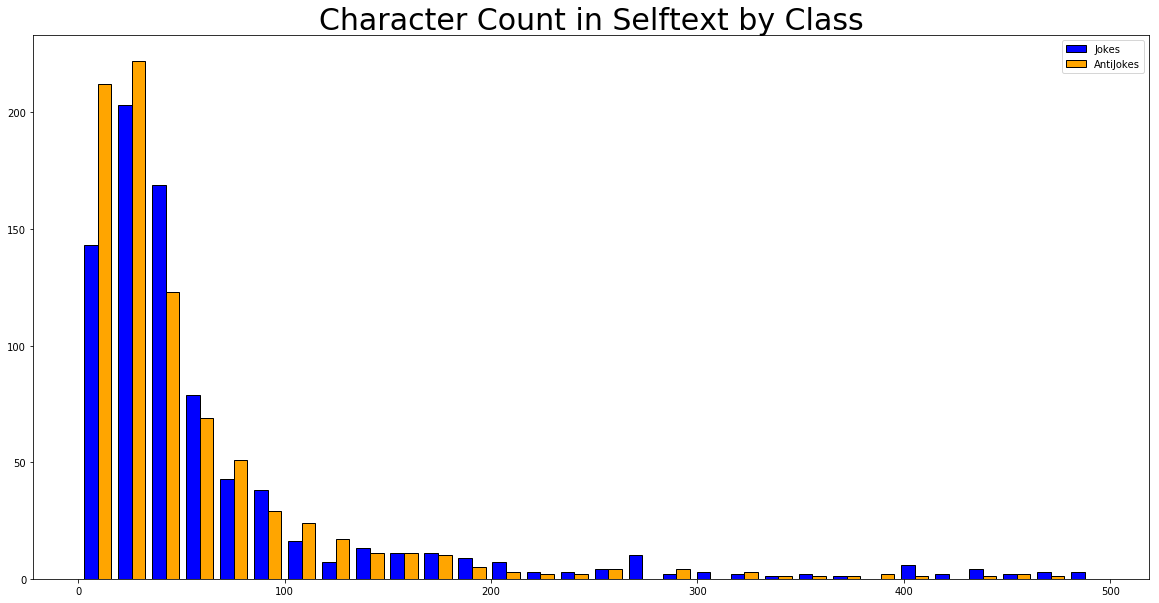

In [31]:
plt.figure(figsize=(20,10))
plt.hist([df[(df['subreddit']==0) & (df['char_count'] < 500)]['char_count'], 
          df[(df['subreddit']==1) & (df['char_count'] < 500)]['char_count']],
         bins=30, color=['blue', 'orange'], ec='k')
plt.title('Character Count in Selftext by Class', fontsize=30)
plt.legend(['Jokes', 'AntiJokes']);

_Note, because of the outliers of the jokes, its difficult to see the distribution near the lower end. I limited the char counts to less than 500 for this graph. It seems that while both jokes and antijokes have the most of their distribution in the lower end (below 100), the antijokes char count is greater than jokes char count below 50, whereas the jokes char count is generally greater than the antijokes char count above 50. It seems that antijokes have more short, one sentence responses whereas jokes, while mostly short, have longer responses._

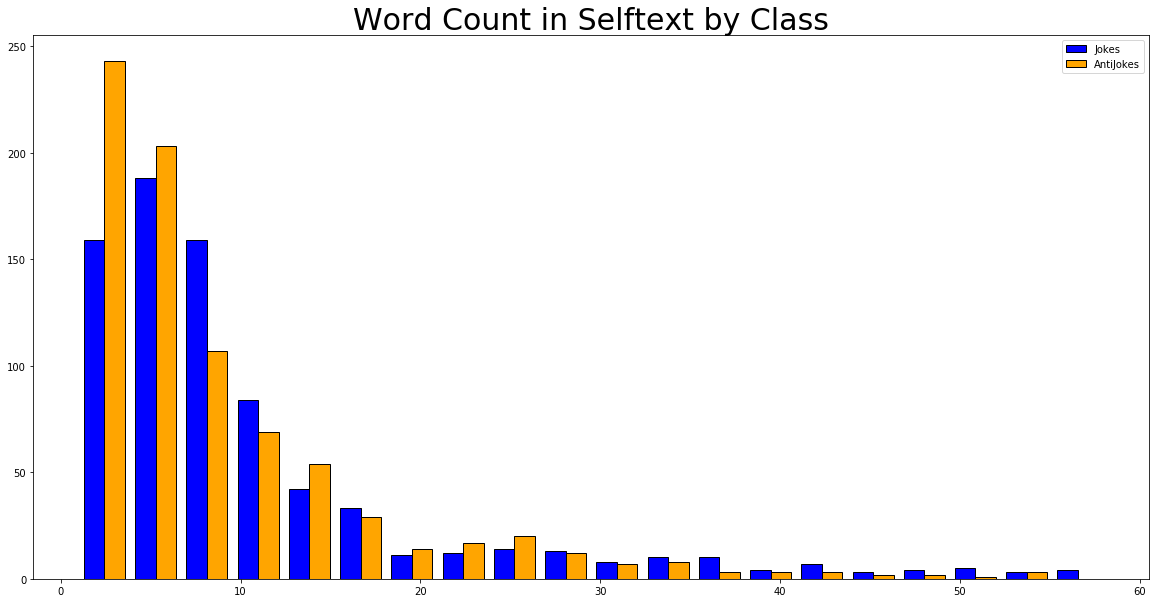

In [35]:
plt.figure(figsize=(20,10))
plt.hist([df[(df['subreddit']==0) & (df['word_count'] < 60)]['word_count'], 
          df[(df['subreddit']==1) & (df['word_count'] < 60)]['word_count']],
         bins=20, color=['blue', 'orange'], ec='k')
plt.title('Word Count in Selftext by Class', fontsize=30)
plt.legend(['Jokes', 'AntiJokes']);

_As with the Character counts graph, I limited the word counts to less than 60. As the graph shows, we can see that antijokes have a higher word count in the lower end (less than 6 words), and jokes have a higher word count (generally) above 6 words. All in all, the distributions of the character and word counts are telling. Antijokes generally have a lower character and word count, and jokes have a higher count for both. This makes sense since antijokes are usually pithy one-liners that go against conventional joke punchlines._

## Lemmatizing and CountVectorizing

_First, titles must be tokenized and lemmatized._

In [40]:
# Tokenizing by alphanumeric characters
tokenizer = RegexpTokenizer('\w+')

# Making all tokens lowercase
tokens = [tokenizer.tokenize(post.lower()) for post in (df['selftext'])]

In [41]:
tokens

[['wife',
  'sobbing',
  'you',
  'can',
  't',
  'do',
  'this',
  'to',
  'me',
  'husband',
  'i',
  'know',
  'that',
  's',
  'why',
  'i',
  'am',
  'doing',
  'it',
  'with',
  'her'],
 ['batman',
  'doesn',
  't',
  'want',
  'to',
  'get',
  'shot',
  'why',
  'does',
  'robin',
  'wear',
  'bright',
  'clothing',
  'batman',
  'doesn',
  't',
  'want',
  'to',
  'get',
  'shot'],
 ['guilty',
  'said',
  'the',
  'man',
  'in',
  'the',
  'dock',
  'at',
  'this',
  'point',
  'a',
  'man',
  'at',
  'the',
  'back',
  'of',
  'the',
  'court',
  'stood',
  'up',
  'and',
  'shouted',
  'you',
  'dirty',
  'rat',
  'the',
  'judge',
  'asked',
  'the',
  'man',
  'to',
  'site',
  'down',
  'and',
  'to',
  'refrain',
  'from',
  'making',
  'any',
  'noise',
  'the',
  'judge',
  'continued',
  'and',
  'that',
  'also',
  'on',
  'the',
  '17th',
  'september',
  'you',
  'are',
  'accused',
  'of',
  'killing',
  'your',
  'son',
  'by',
  'beating',
  'him',
  'to',
  'dea

In [42]:
# Initializing lemmatizer
lemmatizer = WordNetLemmatizer()

# Creating a list of posts (selftext) that are lemmatized
# First had to lemmatize for each word in post, 
# then rejoin words into one string for post
lems = []
for post in tokens:
    tok_post = []
    for word in post:
        tok_post.append(lemmatizer.lemmatize(word))
    posts = " ".join(tok_post)
    lems.append(posts)

In [43]:
lems

['wife sobbing you can t do this to me husband i know that s why i am doing it with her',
 'batman doesn t want to get shot why doe robin wear bright clothing batman doesn t want to get shot',
 'guilty said the man in the dock at this point a man at the back of the court stood up and shouted you dirty rat the judge asked the man to site down and to refrain from making any noise the judge continued and that also on the 17th september you are accused of killing your son by beating him to death with a hammer how do you plead guilty said the man in the dock again the same man at the back stood up and shouted even louder you dirty rotten stinking rat at this point the judge called the man to the bench and said i have already asked you to be quiet if you continue with these outburst i will have to charge you with contempt of court i can understand your feeling but what relationship have you to this man he replied he is my next door neighbor the judge replied i can understand your feeling the

In [73]:
# Initializing a count vectorizer and fitting it
vect = CountVectorizer(analyzer='word', stop_words = 'english', min_df = 3)
terms = vect.fit_transform(lems)
text = pd.DataFrame(terms.todense(), columns = vect.get_feature_names())

In [74]:
text.head()

,000,10,100,11,12,15,20,25,30,300,...,yeah,year,yell,yelled,yelling,yellow,yes,yesterday,young,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,3,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# Insert the target back into the DataFrame
text.insert(0, 'target',target)

In [76]:
text.head()

,target,000,10,100,11,12,15,20,25,30,...,yeah,year,yell,yelled,yelling,yellow,yes,yesterday,young,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,3,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Looking at the most common words

In [77]:
# Creating a dictionary for the most common words to the counts
term_counts = {col : text[col].sum() for col in text.columns[1:]}

# Creating a DataFrame for the Term Count Distribution (tcd)
tcd = pd.DataFrame(term_counts, index = ['counts'])
tcd = tcd.T
tcd.head()

,counts
000,9
10,24
100,8
11,7
12,5


In [78]:
# Sort the tcd by count values
tcd.sort_values(by="counts", ascending=False).head(10)

,counts
wa,481
say,205
said,196
man,188
just,152
don,131
know,118
like,116
black,114
day,113


In [79]:
# Take the top 20 words and visualize them into a heatmap
top20 = list(tcd.sort_values(by = 'counts', ascending = False).head(20).index)
# Also added target to the list
top20.append('target')

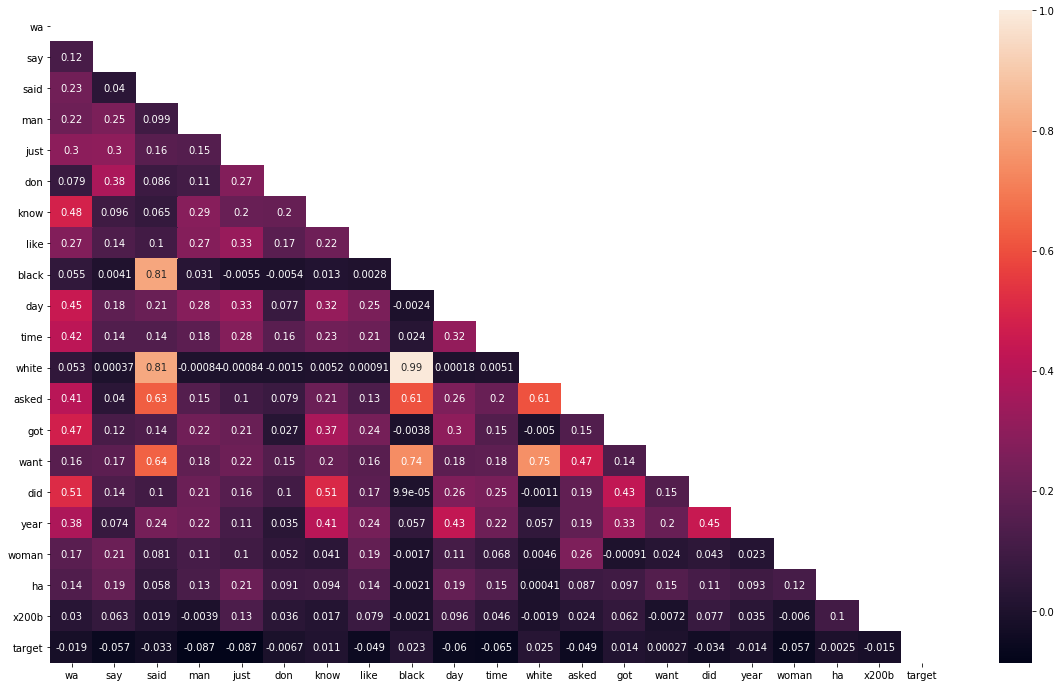

In [80]:
# Creating the heatmap
plt.figure(figsize = (20,12))
corr = text[top20].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask = mask, annot=True);

_There seems to be no strong correlations between the target and any words according to the visualization._

In [71]:
# Terms that are least correlated to the target
text.corr().sort_values(by='target')['target'].head(12)

reply     -0.099872
asks      -0.092480
came      -0.087755
man       -0.086542
just      -0.086530
edit      -0.071683
replied   -0.068212
yeah      -0.066934
pull      -0.066476
time      -0.065029
lady      -0.063797
come      -0.063384
Name: target, dtype: float64
BlockIndex
Block locations: array([0], dtype=int32)
Block lengths: array([12], dtype=int32)

In [72]:
# Terms that are most correlated to the target
text.corr().sort_values(by='target', ascending=False)['target'].head(12)

target        1.000000
seriously     0.078197
depends       0.067468
asking        0.062492
antijokes     0.060501
punchline     0.058065
divorce       0.055213
cancer        0.052832
depression    0.052832
hydrogen      0.052372
exist         0.049370
level         0.049370
Name: target, dtype: float64
BlockIndex
Block locations: array([0], dtype=int32)
Block lengths: array([12], dtype=int32)

_There aren't any words that are strongly correlated (both positive and negative) with the target._

_Next, I used `groupby` to get some aggregates (mainly `sum` and `mean`) over the classes._

In [81]:
# Getting the term frequency relative to the target
text.groupby('target').mean().T.sort_values(by=0, ascending=False)

target,0,1
wa,0.304643,0.251781
man,0.169875,0.045131
say,0.150623,0.085511
said,0.143828,0.081948
just,0.117780,0.057007
day,0.088335,0.041568
time,0.086070,0.041568
like,0.082673,0.051069
asked,0.081540,0.034442
don,0.078143,0.073634


In [82]:
text.groupby('target').sum().T.sort_values(by=0, ascending=False)

target,0,1
wa,269,212
man,150,38
say,133,72
said,127,69
just,104,48
day,78,35
time,76,35
like,73,43
asked,72,29
don,69,62


### Looking for common words between the classes and conducting a hypothesis test to see if those words have the same mean frequency

In [83]:
# Getting the top 20 words for both classes
top_words_jokes = list(text.groupby('target').mean().T.sort_values(0, ascending=False).head(20).index)
top_words_ajokes = list(text.groupby('target').mean().T.sort_values(1, ascending=False).head(20).index)

In [84]:
# A list of words that are in the top 20 for both classes
top_words_overlap = [joke for joke in top_words_jokes if joke in top_words_ajokes]

In [85]:
top_words_overlap

['wa',
 'man',
 'say',
 'said',
 'just',
 'day',
 'time',
 'like',
 'don',
 'know',
 'want',
 'year']

_Conducting a hypothesis test on the overlap words to see if those words have the same mean frequency in both classes. As a question: will these words provide signal or noise in our model if they are included? We will set our alpha to 0.01._

$H_0$: The /r/Jokes and the /r/AntiJokes subreddits have the same mean frequency for word $x$.  
$H_A$: The /r/Jokes and the /r/AntiJokes subreddits do not have the same mean frequency for word $x$.

In [86]:
# Importing the scipy.stats library to access the t-test function
from scipy.stats import ttest_ind

# Storing P-value, t-stat, and word into a dictionary
ttest_dict = {}

for word in top_words_overlap:
    ttest_dict[word] = ttest_ind(text[text['target']==1][word], 
                                 text[text['target']==0][word])

In [88]:
len(ttest_dict)

12

In [87]:
ttest_dict

{'wa': Ttest_indResult(statistic=-0.8000953040790828, pvalue=0.42376587784665176),
 'man': Ttest_indResult(statistic=-3.605819204130936, pvalue=0.00032003009515112256),
 'say': Ttest_indResult(statistic=-2.386484821425375, pvalue=0.017117675409632393),
 'said': Ttest_indResult(statistic=-1.358826603424033, pvalue=0.17437938949558707),
 'just': Ttest_indResult(statistic=-3.6052900450864755, pvalue=0.00032067799505928606),
 'day': Ttest_indResult(statistic=-2.4867724645600853, pvalue=0.01298482929107353),
 'time': Ttest_indResult(statistic=-2.7049980424357956, pvalue=0.00689774875603761),
 'like': Ttest_indResult(statistic=-2.0312659621647793, pvalue=0.04238124529054872),
 'don': Ttest_indResult(statistic=-0.2781958856932046, pvalue=0.7808953725498822),
 'know': Ttest_indResult(statistic=0.45061167460262735, pvalue=0.6523261468592882),
 'want': Ttest_indResult(statistic=0.011002024737050985, pvalue=0.9912231051020296),
 'year': Ttest_indResult(statistic=-0.5634267715216407, pvalue=0.5732

_Looking at the p-values of the words in the dictionary, we can conclude the following:_  
- Accept $H_0$ for:  
    - wa, say, said, day, like, don, know, want, year 
- Reject $H_0$ for:  
    - man, just, time
    
_Therefore, words for which we accepted the null hypothesis can be included in our stop words list since they will only add noise. The words for which we rejected the null hypothesis will be important in identfying signal in our model._

## Using TF-IDF to compare results to CountVectorization

In [89]:
# Importing the TFIDF module
from sklearn.feature_extraction.text import TfidfVectorizer

# min_df accepts words that appear less often
tfidf = TfidfVectorizer(stop_words='english', min_df=3, max_df=1.0)

term_mat_t = tfidf.fit_transform(lems)
term_tfidf = pd.DataFrame(term_mat_t.toarray(), columns=tfidf.get_feature_names())

In [90]:
term_tfidf.shape

(1725, 1260)

In [91]:
# Getting the max, mean, and sum for each word in the TFIDF vectorization
col_max = {col: [term_tfidf[col].max(), 
                 term_tfidf[col].mean(),
                 term_tfidf[col].sum()] for col in term_tfidf.columns}

tf_df = pd.DataFrame(col_max, index = ['max','mean','sum']).T

In [92]:
tf_df.head()

,max,mean,sum
000,0.612083,0.000641,1.104978
10,0.570276,0.002248,3.877750
100,1.000000,0.001086,1.873080
11,1.000000,0.001467,2.530045
12,0.521702,0.000593,1.022738


In [64]:
tf_df.sort_values(by = ['max','sum'], ascending = False).head(35)

,max,mean,sum
did,1.0,0.034835,60.089831
like,1.0,0.031732,54.738477
wa,1.0,0.022526,38.857876
say,1.0,0.020480,35.327799
joke,1.0,0.020433,35.246456
man,1.0,0.019036,32.836448
doe,1.0,0.016618,28.665830
difference,1.0,0.014520,25.047582
know,1.0,0.013791,23.790111
woman,1.0,0.013404,23.121101


_According to TFIDF, some common words are man, woman, wife, guy, dad, and difference._

## Sentiment Analysis by Class

In [93]:
# Importing the Sentiment Analysis module
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Initializing the SIA, creating a dict
sia = SentimentIntensityAnalyzer()
dicts = []

# Getting a SIA score for each lemmatized title
for st in lems:
    scores = sia.polarity_scores(st)
    scores['text'] = st
    dicts.append(scores)
    
# Creating a dataframe with the dictionary, adding target
df_sent = pd.DataFrame(dicts)
df_sent['target'] = target

In [94]:
# Grouping scores by target
df_sent.groupby(by='target').mean()

,compound,neg,neu,pos
target,,,,
0,0.036890,0.082133,0.832510,0.085361
1,-0.043276,0.132197,0.777217,0.079905


_Looking at the sentiment analysis scores by target, there seems to be a slightly more negative mean sentiment score (0.05 difference) in Antijokes and more neutral sentiment in Jokes. In general, jokes (target = 0) have a very slightly positive compound score whereas antijokes (target = 1) have a very slightly negative compound score._

## Exploratory Data Analysis on Selftext (Content) - Conclusions
- Generally speaking, the titles of jokes and antijokes are telling in that Antijokes have more shorter posts (less than 6 words) than Jokes, and Jokes have more posts that are longer.
- Some words to add to the stop words list (words that add noise) are wa, say, said, day, like, don, know, want, year.
- Antijokes are slightly more negative in sentiment scores than jokes.